In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


In [2]:

def show_image(pixels, label, color ="gray"):
    pixels = pixels.reshape((28,28))
    plt.imshow(pixels, cmap=color)
    plt.show()
    

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)


In [ ]:
print "X_train = %d \n y_train = %d"%(len(X_train), len(y_train))
print "X_test = %d \n y_test = %d"%(len(X_test), len(y_test))

In [ ]:
X_train.shape

In [ ]:
show_image(X_train[0], y_test[0])

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


## Greatshearch ##
El siguiente link tiene un ejemplo de greatshearch para svc. Se definen distintos parametros y se printea cual de las combinaciones de ellos es la mas optima. Es un procesos costoso que habria que hacer algun dia D:

http://scikit-learn.org/0.18/auto_examples/model_selection/grid_search_digits.html

In [6]:
### Entrenamos la maquina SVM ###
from sklearn import svm

svc = svm.SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, y_train)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Confusion matrix, without normalization
[[844   1  19  19   6   2 102   0   7   0]
 [  2 981   5   8   3   0   1   0   0   0]
 [ 32   3 826  12  68   0  58   0   1   0]
 [ 42   8  23 865  26   0  30   0   6   0]
 [  3   1  99  40 804   0  48   0   5   0]
 [  1   0   0   1   0 965   0  16   2  15]
 [144   1  90  26  69   0 663   0   7   0]
 [  0   0   0   0   0  20   0 954   0  26]
 [  7   0   9   4   3   3  10   2 962   0]
 [  0   1   0   0   0  11   1  25   1 961]]


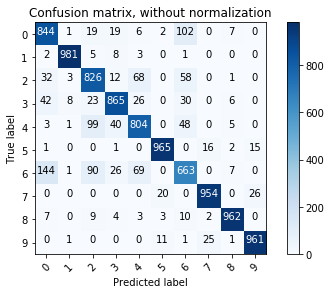

             precision    recall  f1-score   support

          0       0.79      0.84      0.81      1000
          1       0.98      0.98      0.98      1000
          2       0.77      0.83      0.80      1000
          3       0.89      0.86      0.88      1000
          4       0.82      0.80      0.81      1000
          5       0.96      0.96      0.96      1000
          6       0.73      0.66      0.69      1000
          7       0.96      0.95      0.96      1000
          8       0.97      0.96      0.97      1000
          9       0.96      0.96      0.96      1000

avg / total       0.88      0.88      0.88     10000



In [8]:
### Clasificamos SVM ###
y_predict = svc.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, y_predict))

In [4]:
### Entrenamos la maquina RandomForest ###
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier() # Creando el modelo
rf.fit(X_train, y_train) # Ajustando el modelo


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Confusion matrix, without normalization
[[841   0  18  32   2   1  96   0  10   0]
 [  9 957   6  20   2   0   5   0   1   0]
 [ 13   0 799  14 103   0  68   0   3   0]
 [ 34   8  20 887  23   0  26   0   2   0]
 [  5   2 147  50 750   0  44   0   2   0]
 [  0   0   0   2   0 955   0  34   1   8]
 [187   1 137  30  93   0 534   0  18   0]
 [  0   0   0   0   0  27   0 924   0  49]
 [  1   2  12   4   4   3   7   6 961   0]
 [  1   0   1   0   0  14   0  44   1 939]]


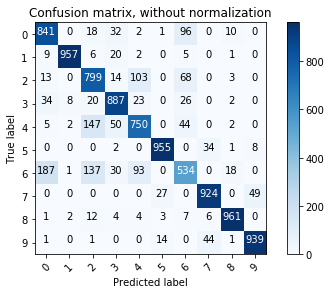

             precision    recall  f1-score   support

          0       0.77      0.84      0.80      1000
          1       0.99      0.96      0.97      1000
          2       0.70      0.80      0.75      1000
          3       0.85      0.89      0.87      1000
          4       0.77      0.75      0.76      1000
          5       0.95      0.95      0.95      1000
          6       0.68      0.53      0.60      1000
          7       0.92      0.92      0.92      1000
          8       0.96      0.96      0.96      1000
          9       0.94      0.94      0.94      1000

avg / total       0.85      0.85      0.85     10000



In [5]:
### Clasificamos RandomForest ###
predict = rf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, predict)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
plt.show()

print(classification_report(y_test, predict, class_names))

In [ ]:
# MEDIMOS PREDICCION DE SVC
from sklearn.metrics import f1_score

f1_score(y_test, y_predict, average='macro')  
f1_score(y_test, y_predict, average='micro')  
f1_score(y_test, y_predict, average='weighted')  
f1_score(y_test, y_predict, average=None)